<a href="https://colab.research.google.com/github/liady/ssp19ai/blob/master/Excercise_1_Simple_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SSP19 - Machine Learning

<img src="https://i.ibb.co/KV784Nc/SSP19.png"/>

## A Simple Neural Network Classifier

In this excercise, we will get familiar with some of the basic concepts of neural networks.

In order to understand the meaning of a **classifier** - we will build a simple neural network that will receive points on a graph as an input - and will have to classify them to the appropriate class.

###"Hello World" with Google Colab

*(Note - In order to run a cell - select it and press Ctrl + Enter)*

In [3]:
print("Hello World")

Hello World


###Requirements

Let's make sure we have the latest version of [TensorFlow](https://www.tensorflow.org/tutorials) Installed:

In [2]:
!pip install tensorflow==2.0.0-beta1

  Using cached https://files.pythonhosted.org/packages/29/6c/2c9a5c4d095c63c2fb37d20def0e4f92685f7aee9243d6aae25862694fd1/tensorflow-2.0.0b1-cp36-cp36m-manylinux1_x86_64.whl


Let's also make sure to import all the libraries that we need in order to run the excercise:

In [120]:
!git clone https://github.com/liady/ssp19ai_utils.git
!git -C ssp19ai_utils pull
import ssp19ai_utils.utils as utils
import importlib
importlib.reload(utils)

fatal: destination path 'ssp19ai_utils' already exists and is not an empty directory.
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/liady/ssp19ai_utils
   172bee0..5b4ac72  master     -> origin/master
Updating 172bee0..5b4ac72
Fast-forward
 utils.py | 212 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 1 file changed, 212 insertions(+)


<module 'ssp19ai_utils.utils' from '/content/ssp19ai_utils/utils.py'>

In [113]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf # The framework to run our models
from tensorflow import keras # High order layers, models, etc
from keras.utils import to_categorical # Utilities
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version is " + tf.__version__)

TensorFlow version is 2.0.0-beta1


###Generate Data

Let's generate our initial data. Note that the parameters are adjustable:

In [0]:
POINTS_PER_CLASS = 100 # number of points per class
NUMBER_OF_CLASSES = 3 # number of classes

# Randomly generates data points and their labels
points, labels = utils.generateDataPoints(NUMBER_OF_CLASSES, POINTS_PER_CLASS)

Take a look on our data shape:

In [72]:
points.shape

(300, 2)

Print some labels:

In [73]:
print(labels[10], labels[110], labels[120], labels[250])

0 1 1 2


Let's visualize the data on a graph:

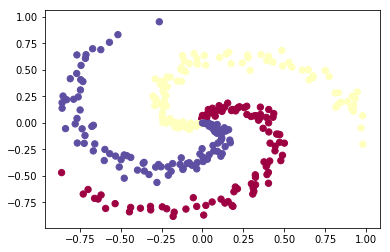

In [90]:
# visualize the data:
utils.visualize_points(points, labels)

### Build The Model

In [0]:
# Define the architecture
model = keras.Sequential([
    keras.layers.Dense(100, input_dim=2, activation="relu"),
    keras.layers.Dense(3, activation="softmax")
])

# Define the functionality
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

###Prepare the data

**Important!** Make sure to shuffle the data (why?):

In [0]:
points, labels = shuffle(points, labels)

Change our labels to be *categorical* instead of *numerical*:

In [0]:
labels_categorical = to_categorical(labels)

### Train the model!

In [100]:
history = model.fit(points, labels_categorical, validation_split=0.25, epochs=500)

Train on 225 samples, validate on 75 samples
Epoch 1/500
225/225 [==============================] - 0s 934us/sample - loss: 1.0711 - accuracy: 0.4711 - val_loss: 1.0588 - val_accuracy: 0.4133
Epoch 2/500
225/225 [==============================] - 0s 103us/sample - loss: 1.0456 - accuracy: 0.4667 - val_loss: 1.0408 - val_accuracy: 0.4267
Epoch 3/500
225/225 [==============================] - 0s 94us/sample - loss: 1.0261 - accuracy: 0.4800 - val_loss: 1.0249 - val_accuracy: 0.4400
Epoch 4/500
225/225 [==============================] - 0s 94us/sample - loss: 1.0071 - accuracy: 0.5067 - val_loss: 1.0095 - val_accuracy: 0.4667
Epoch 5/500
225/225 [==============================] - 0s 85us/sample - loss: 0.9902 - accuracy: 0.5511 - val_loss: 0.9933 - val_accuracy: 0.4800
Epoch 6/500
225/225 [==============================] - 0s 93us/sample - loss: 0.9735 - accuracy: 0.5778 - val_loss: 0.9805 - val_accuracy: 0.4933
Epoch 7/500
225/225 [==============================] - 0s 99us/sample - loss:

###Analyze Results

Let's see where our model puts the decision boundaries for the classification:

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3c64390ef0>)

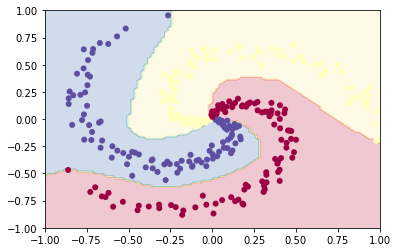

In [101]:
utils.plot_decision_boundary(points, labels, model)

Let's run our model on the data, to get predictions:

Confusion matrix


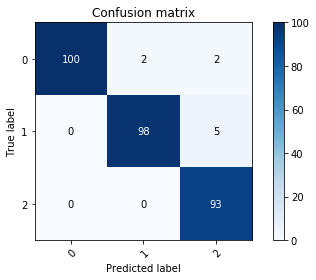

In [119]:
predicted = np.argmax(network.predict(points), axis=1)
utils.plot_confusion_matrix(predicted, labels)

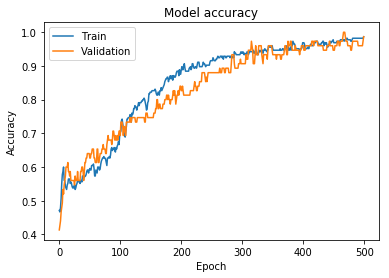

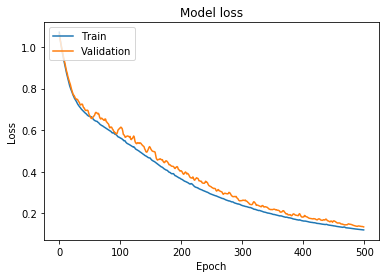

In [108]:
# Plot training & validation accuracy through training
utils.plot_accuracy_and_loss(history)